# **World University Rankings Visualizations and Analysis with Plotly**

## Loading Libraries, Data and Explaining the Variables
Loading libraries, importing the dataset, and providing a brief explanation of the variables are the essential first steps in data analysis, ensuring that the necessary tools and data are ready for exploration and understanding.

In [1]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For additional data visualization
import numpy as np  # For numerical operations
import plotly as py  # For creating interactive graphs
import plotly.graph_objs as go  # For defining plotly graph objects 
from plotly.offline import init_notebook_mode, plot, iplot  # For offline plotting
init_notebook_mode(connected=True)

In [2]:
# Load the World University Rankings dataset from a CSV file
data = pd.read_csv("/kaggle/input/world-university-rankings/timesData.csv")  # Reads the dataset into a Pandas DataFrame
data.head(5)  # Displays the first 5 rows of the dataset to preview its structure

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [3]:
data.tail(5)  # Displays the last 5 rows of the dataset to preview its structure

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
2598,601-800,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,-,"21,958",15.3,3%,48 : 52,2016
2599,601-800,Yıldız Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,-,"31,268",28.7,2%,36 : 64,2016
2600,601-800,Yokohama City University,Japan,24.0,16.1,10.2,36.4,37.9,-,"4,122",3.7,3%,NaN,2016
2601,601-800,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,-,"10,117",12.1,8%,28 : 72,2016
2602,601-800,Yuan Ze University,Taiwan,16.2,17.7,18.3,28.6,39.8,-,"8,663",20.6,4%,43 : 57,2016


In [4]:
data.columns  # Lists all column names in the dataset to understand its structure

Index(['world_rank', 'university_name', 'country', 'teaching', 'international',
       'research', 'citations', 'income', 'total_score', 'num_students',
       'student_staff_ratio', 'international_students', 'female_male_ratio',
       'year'],
      dtype='object')

In [5]:
data.info()   # Provides a summary of the dataset, including data types and non-null counts for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [6]:
data.describe()  # Displaying the summary statistics

,teaching,research,citations,student_staff_ratio,year
count,2603.000000,2603.000000,2603.000000,2544.000000,2603.000000
mean,37.801498,35.910257,60.921629,18.445283,2014.075682
std,17.604218,21.254805,23.073219,11.458698,1.685733
min,9.900000,2.900000,1.200000,0.600000,2011.000000
25%,24.700000,19.600000,45.500000,11.975000,2013.000000
50%,33.900000,30.500000,62.500000,16.100000,2014.000000
75%,46.400000,47.250000,79.050000,21.500000,2016.000000
max,99.700000,99.400000,100.000000,162.600000,2016.000000


In [7]:
data.dtypes  # Checking data types of each column

world_rank                 object
university_name            object
country                    object
teaching                  float64
international              object
research                  float64
citations                 float64
income                     object
total_score                object
num_students               object
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object

## Checking for Missing Values
Let's examine which variables have missing values.

In [8]:
data.replace("-", np.nan, inplace=True) # before removing the missing values, we need to replace all the "-" values to nan

In [9]:
data.isnull().sum()  # Checking for missing values in each column

world_rank                   0
university_name              0
country                      0
teaching                     0
international                9
research                     0
citations                    0
income                     218
total_score               1402
num_students                59
student_staff_ratio         59
international_students      67
female_male_ratio          236
year                         0
dtype: int64

## Solution for Missing Data
- Deleting Missing Data:
If the proportion of missing data is very low (for example, only a few observations are missing), deleting the missing values is generally a reliable option. This is especially suitable for cases where the missing data doesn't significantly impact the overall analysis.
In this case, if the missing data is only a small portion of the dataset, deleting it will not significantly affect the results of the analysis.

- Filling Missing Data with Mean/Median:
If the number of missing values is higher, and deleting them might jeopardize the validity of the analysis, filling the missing data appropriately can be a good solution.
Filling with the mean is typically suitable when the data distribution is symmetrical.
Filling with the median is a better option when the data distribution is skewed, as the median is less affected by extreme outliers.

- Filling with Zero:
This method can be used, especially when zero has a meaningful context in the data (e.g., "number of students"). However, it should be used cautiously, as it may not align with the natural structure of the data and could lead to misleading analysis results.


For this notebook, we are going to drop all missing values.

In [10]:
data_cleaned = data.dropna()  # Drop rows with missing data (if necessary)
data_cleaned # from now on we will work on this dataset

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46 : 54,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,=196,Newcastle University,United Kingdom,30.9,84.3,27.5,81.5,34.7,49.2,"20,174",15.2,29%,50 : 50,2016
1999,=196,"St George’s, University of London",United Kingdom,25.6,69.5,18.1,100.0,37.7,49.2,"2,958",13.4,17%,61 : 39,2016
2000,198,University of Trento,Italy,30.8,55.9,27.4,87.7,47.1,49.1,"16,841",43.2,8%,51 : 49,2016
2001,199,Paris Diderot University – Paris 7,France,30.5,64.9,22.9,91.0,29.0,48.9,"27,756",14.8,17%,63 : 37,2016


In [11]:
data_cleaned.isnull().sum() # Checking whether NA's are dropped or not

world_rank                0
university_name           0
country                   0
teaching                  0
international             0
research                  0
citations                 0
income                    0
total_score               0
num_students              0
student_staff_ratio       0
international_students    0
female_male_ratio         0
year                      0
dtype: int64

Then, since all the NA is removed, we can start visualizing the data.

## Visualizations

### Line Plot: University Ranking Over Time

In [12]:
# Filter data for a specific university, e.g., Harvard University
harvard_data = data[data['university_name'] == 'Harvard University']

line = go.Scatter(
    x = harvard_data.year, 
    y = harvard_data.world_rank, 
    mode = "lines+markers", 
    name = "World Rank",
    marker = dict(color = "rgba(80,120,100,1)"),
    text = harvard_data.university_name)

data_ = [line]
layout = dict(title = "Harvard University Ranking Over Time",
              xaxis = dict(title = "Year"),
              yaxis = dict(title = "World Ranking"))
fig = dict(data = data_, layout = layout)
iplot(fig)

### Scatter Plot: Research vs Citations

In [13]:
# Define the scatter plot for Research vs Citations
scatter = go.Scatter(
    x = data_cleaned.research,                      # X-axis: Research scores
    y = data_cleaned.citations,                     # Y-axis: Citation scores
    mode = "markers",                     # Display only markers (no lines)
    name = "Research vs Citations",       # Legend name for the plot
    marker = dict(color = "rgba(120, 99, 132, 0.7)"),  # Marker color (light purple)
    text = data_cleaned.university_name             # Hover text showing university names
)

# Define the data list with the Scatter object
data_ = [scatter]

# Set up the layout for the plot
layout = dict(
    title = "Research vs Citations",       # Title of the plot
    xaxis = dict(title = "Research Score"), # X-axis label
    yaxis = dict(title = "Citation Score")  # Y-axis label
)

# Create the figure dictionary with data and layout
fig = dict(data = data_, layout = layout)
iplot(fig)

### Bar Plot: Average Teaching Score by Country

In [14]:
average_teaching_by_country = data_cleaned.groupby("country")["teaching"].mean().reset_index()
average_teaching_by_country

,country,teaching
0,Australia,48.052273
1,Austria,41.585714
2,Belgium,43.157143
3,Brazil,62.350000
4,Canada,47.943243
5,China,62.630000
6,Denmark,37.605556
7,Egypt,29.500000
8,Finland,42.083333
9,France,48.380769


In [15]:
# Create the bar plot for average teaching score by country
bar = go.Bar(
    x = average_teaching_by_country.country,
    y =average_teaching_by_country.teaching,
    name = "Average Teaching Score",
    marker =dict(color = "rgba(255,127,39,0.5)",
                line = dict(color = "rgba(0, 0, 0, 1)",width = 1)),
    text = average_teaching_by_country.country
)

# Define the data list with the Bar object
data_ = [bar]

# Set up the layout for the plot
layout = dict(
    title = "Average Teaching Score by Country",  # Title of the plot
    xaxis = dict(title = "Country"),              # X-axis label
    yaxis = dict(title = "Average Teaching Score"),  # Y-axis label
    showlegend = False  # Hide the legend as it's a single bar plot
)

# Create the figure dictionary with data and layout
fig = dict(data = data_, layout = layout)
iplot(fig)

### Box Plot: Income Distribution Across Countries

In [16]:
# Create a box plot for the 'income' column grouped by country
box1 = go.Box(
    y = data_cleaned.income.astype(float),  # Convert income to float for proper plotting
    x = data_cleaned.country,               # Group by country for categorical X-axis
    name = "Income Distribution by Country",  # Set the name for the legend
    boxmean = True,                     # Display the mean as a line in the box plot
    marker = dict(
        color = "rgba(100,149,237,0.7)"  # Set a blue tone with transparency for the box color
    ),
)

# Combine the box plot into a data list
data_ = [box1]

# Set up the layout
layout = dict(
    title = "Income Distribution Across Countries",  # Title of the plot
    xaxis = dict(title = "Country"),                     # X-axis label
    yaxis = dict(title = "Income"),                      # Y-axis label
    boxmode = 'group',                                   # Group mode for box plots
)

# Create the figure dictionary with data and layout
fig = dict(data = data_, layout = layout)
iplot(fig)

This may seem too crowded when reviewing. If you wish, you can choose the first 5-10 countries or consider a specific year.

### Pie Chart: Distribution of Gender Ratio
We want to examine the general gender distribution of the data we have, but when we first checked the data, the female and male rates are given combined. First we need to separate them and then the necessary operations are shown as follows.

In [17]:
# Ensure data is copied properly
data_cleaned = data_cleaned.copy()

# Clean and split the female_male_ratio column into separate female and male counts
data_cleaned[['female', 'male']] = data_cleaned['female_male_ratio'].str.split(":", expand=True)

# Check for successful splitting
print(data_cleaned[['female', 'male']].head())

# Convert female and male counts to numeric
data_cleaned['female'] = pd.to_numeric(data_cleaned['female'], errors='coerce')
data_cleaned['male'] = pd.to_numeric(data_cleaned['male'], errors='coerce')

# Check for conversion success
print(data_cleaned[['female', 'male']].dtypes)

# Aggregate the total female and male percentages
total_female = data_cleaned['female'].sum()
total_male = data_cleaned['male'].sum()

# Check total values
print("Total Female:", total_female)
print("Total Male:", total_male)

  female male
1    33    67
2    37    63
3    42    58
5    46    54
6    46    54
female    int64
male      int64
dtype: object
Total Female: 47179
Total Male: 48221


In [18]:
# Prepare labels and values for the pie chart
labels = ['Female', 'Male']
values = [total_female, total_male]

# Create a pie chart for gender distribution
pie = go.Pie(
    labels=labels,
    values=values,
    hoverinfo="label+value+percent",
    textinfo="value+percent",
    rotation=180,
    hole=0.3,
    marker=dict(
        colors = ["EFB6C8", "344CB7"],
        line=dict(color="rgba(0,0,0,1)", width=1)
    )
)

# Combine the pie chart into a data list
data_ = [pie]

# Define the layout with a title
layout = dict(title="Gender Distribution Across Universities")

# Create the figure with data and layout
fig = dict(data=data_, layout=layout)

# Plot the figure
iplot(fig)


### Choropleth Graph

In [19]:
country_data = data_cleaned.groupby("country").sum()
country_data.head(3)

,world_rank,university_name,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,female,male
country,,,,,,,,,,,,,,,
Australia,3671738115217837385874117173189283762658599176...,University of MelbourneUniversity of SydneyUni...,2114.3,88.089.687.574.270.787.182.593.888.180.875.885...,2518.8,3018.0,47.790.852.757.160.040.844.441.792.162.662.253...,71.061.260.759.151.248.571.971.262.458.651.144...,"40,12841,86820,77134,71838,30950,88240,12814,6...",1177.9,35%28%26%27%33%36%35%35%28%27%36%33%27%35%35%2...,55 : 4557 : 4348 : 5253 : 4747 : 5356 : 4455 :...,88600,2310,2090
Austria,187195139162170182142,University of InnsbruckUniversity of ViennaUni...,291.1,99.563.286.686.389.591.092.6,294.7,380.7,35.027.025.429.129.329.430.2,47.246.747.950.246.246.954.2,"18,20934,65134,65134,65134,65134,65134,651",139.9,39%25%25%25%25%25%25%,54 : 4667 : 3367 : 3367 : 3367 : 3367 : 3367 : 33,14092,456,244
Belgium,1191246710616958931641926185164172559017017135...,KU LeuvenGhent UniversityKU LeuvenGhent Univer...,906.3,29.624.756.747.372.556.649.164.358.558.649.561...,1051.1,1421.0,97.797.199.997.830.899.795.934.5100.099.994.61...,54.854.460.853.045.066.158.450.047.161.355.546...,"42,50332,16642,50332,16628,85642,50332,16628,8...",787.2,18%9%18%9%19%18%9%19%16%18%9%16%19%18%9%16%19%...,54 : 4657 : 4354 : 4657 : 4354 : 4654 : 4657 :...,42290,1160,940


In [20]:
# Create the choropleth map
choropleth = go.Choropleth(
    locations=country_data.index,  # Country names
    locationmode="country names",  # Match country names to Plotly's database
    z=country_data["citations"],  # Data to represent (total scores)
    text = country_data.index,
    autocolorscale = False,
    reversescale = True,
    colorscale='iceFire',  # Color scheme
    colorbar_title='Total Citations',  # Color bar title
)

# Define the layout for the map
layout = go.Layout(
    title = "Total Citations by Country",
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(type = "natural earth")
    )
)

# Create the figure and plot it
fig = go.Figure(data=[choropleth], layout=layout)
iplot(fig)


### 3D Graph

In [21]:
threeD = go.Scatter3d(
    x=data_cleaned.citations,  # X-axis
    y=data_cleaned.research,  # Y-axis
    z=data_cleaned.total_score,  # Z-axis
    mode="markers",  # Marker style
    marker=dict(
        size=5,
        color="lightblue",  # Color by total score
        opacity=0.8
    ),
    text=data_cleaned.university_name  # Hover text
)

layout = go.Layout(
    title="3D Scatter Plot of Citation, Research, and Total Scores",
    scene=dict(
        xaxis_title='Citations',
        yaxis_title='Research',
        zaxis_title='Total Score'
    )
)

# Create the figure and plot it
fig = go.Figure(data=[threeD], layout=layout)
iplot(fig)


In [22]:
# Filter data for the year 2015
data2016 = data_cleaned[data_cleaned.year == 2016]

# Bar plot for citations
sub1 = go.Bar(
    x = data2016.world_rank,  # X-axis: country
    y = data2016.income,     # Y-axis: total score
    name = "Income"          # Legend name for this plot
)

# Line plot for research
sub2 = go.Scatter(
    x = data2016.world_rank,
    y = data2016.research,  # Assuming 'research' is another column
    name = "Research",
    xaxis = "x2",              # Link to secondary x-axis
    yaxis = "y2"               # Link to secondary y-axis
)

# Bar plot for another variable (e.g., citations count)
sub3 = go.Bar(
    x = data2016.world_rank,
    y = data2016.citations,  # Assuming 'citations' is another column
    name = "Citations",
    xaxis = "x3",              # Link to third x-axis
    yaxis = "y3"               # Link to third y-axis
)

# Line plot for another variable (e.g., score trend over time or similar)
sub4 = go.Scatter(
    x = data2016.world_rank,
    y = data2016.total_score,  # Replace with another variable if needed
    name = "Total Score Trend",
    xaxis = "x4",              # Link to fourth x-axis
    yaxis = "y4"               # Link to fourth y-axis
)

data_ = [sub1, sub2, sub3, sub4]

# Layout configuration for subplots in a 2x2 grid
layout = go.Layout(
    # First subplot (top-left)
    xaxis = dict(domain=[0, 0.45]),  # First plot takes the left half
    yaxis = dict(domain=[0.55, 1]),  # First plot takes the top half
    
    # Second subplot (top-right)
    xaxis2 = dict(domain=[0.55, 1]),  # Second plot takes the right half
    yaxis2 = dict(domain=[0.55, 1], anchor="x2"),  # Second plot takes the top half
    
    # Third subplot (bottom-left)
    xaxis3 = dict(domain=[0, 0.45]),  # Third plot takes the left half
    yaxis3 = dict(domain=[0, 0.45], anchor="x3"),  # Third plot takes the bottom half
    
    # Fourth subplot (bottom-right)
    xaxis4 = dict(domain=[0.55, 1]),  # Fourth plot takes the right half
    yaxis4 = dict(domain=[0, 0.45], anchor="x4"),  # Fourth plot takes the bottom half

    # Adding space between the top and bottom rows
    margin = dict(t=6, b=10),  # Increase bottom margin and top margin for spacing
)

# Create the figure using the data and layout
fig = go.Figure(data=data_, layout=layout)
iplot(fig)

### Comparison Boxplots

In [23]:
# Filter the data for the year 2015 and select the first 100 rows
data_cleaned_fixed = data_cleaned.iloc[:100, :]

# Add box plots
box1 = go.Box(y=data_cleaned_fixed.total_score.astype("float"), name='Total Score')
box2 = go.Box(y=data_cleaned_fixed.research, name='Research')
box3 = go.Box(y=data_cleaned_fixed.citations, name='Citations')
box4 = go.Box(y=data_cleaned_fixed.income, name='Income')

layout = go.Layout(
    title="Comparison of Scores",
    yaxis_title="Score",
    boxmode="group"  # Group box plots together
)

# Combine all three box plots into a data list
data_ = [box1, box2, box3, box4]

iplot(data_)


### Animated Graph

In [24]:
# Clean the 'num_students' column by removing commas and converting to numeric
data_cleaned['num_students'] = pd.to_numeric(data_cleaned['num_students'].str.replace(',', ''), errors='coerce')

# Now, create the animated scatter plot
import plotly.express as px

fig = px.scatter(
    data_frame=data_cleaned, 
    x='research',  # X-axis: Research score
    y='total_score',  # Y-axis: Total score
    color='country',  # Color points by country
    size='num_students',  # Size of the points based on the number of students
    animation_frame='year',  # Animate the plot by year
    title="University Total Score vs Research Over Time",
    labels={'total_score': 'Total Score', 'research': 'Research Score', 'num_students': 'Number of Students'},
    category_orders={'year': sorted(data_cleaned['year'].unique())},  # Sorting years
)

# Update layout to improve appearance
fig.update_layout(
    xaxis_title="Research Score",
    yaxis_title="Total Score",
    showlegend=True
)

# Show the plot
fig.show()

## Variable Analysis
### Univariate Analysis

In [25]:
# Visualizing categorical variables
# Define a function to plot the bar chart for a given variable
def plotbar(variable, n = 5): # Visualize at most 5 categories
    data_ = data[variable]
    data_count = data_.value_counts()  # Count occurrences of each category
    data_count = data_count[:n]  # Take the top 'n' categories

    plt.figure(figsize=(6,2))
    plt.bar(data_count.index, data_count, color = "green")
    plt.xticks(data_count.index, data_count.index.values)
    plt.xticks(rotation = 43) # Rotate x-axis labels for better visibility
    plt.ylabel("Frequency")
    plt.title(f"Data Frequency: {variable}")
    plt.show()
    print(f"{data_count}")

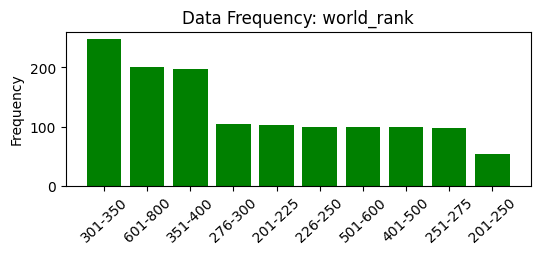

world_rank
301-350    248
601-800    200
351-400    198
276-300    104
201-225    103
226-250    100
501-600    100
401-500     99
251-275     97
201-250     53
Name: count, dtype: int64


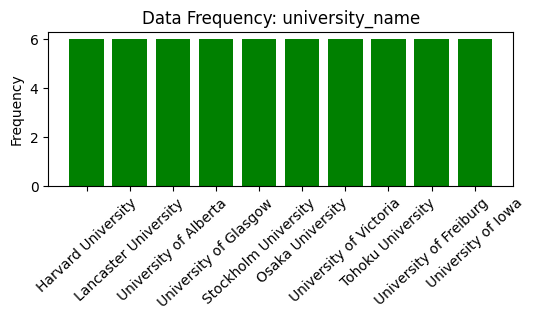

university_name
Harvard University        6
Lancaster University      6
University of Alberta     6
University of Glasgow     6
Stockholm University      6
Osaka University          6
University of Victoria    6
Tohoku University         6
University of Freiburg    6
University of Iowa        6
Name: count, dtype: int64


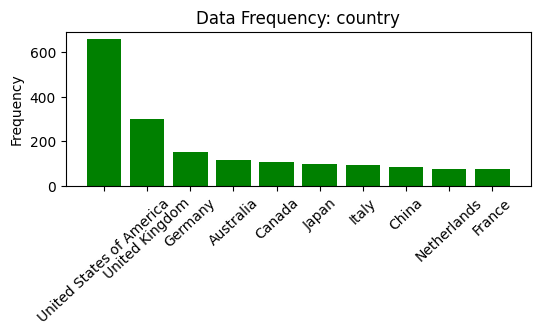

country
United States of America    659
United Kingdom              300
Germany                     152
Australia                   117
Canada                      108
Japan                        98
Italy                        94
China                        83
Netherlands                  75
France                       73
Name: count, dtype: int64


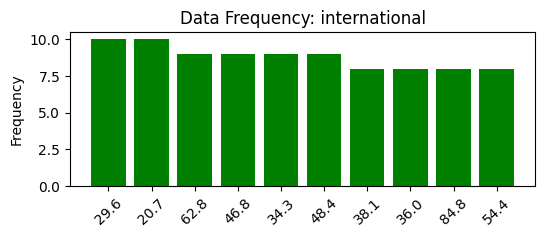

international
29.6    10
20.7    10
62.8     9
46.8     9
34.3     9
48.4     9
38.1     8
36.0     8
84.8     8
54.4     8
Name: count, dtype: int64


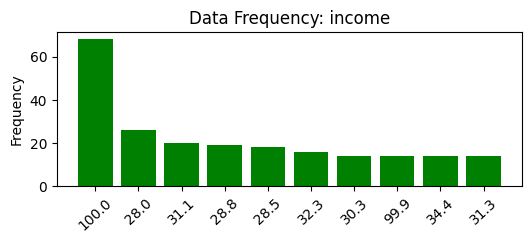

income
100.0    68
28.0     26
31.1     20
28.8     19
28.5     18
32.3     16
30.3     14
99.9     14
34.4     14
31.3     14
Name: count, dtype: int64


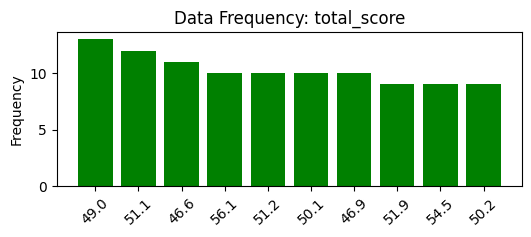

total_score
49.0    13
51.1    12
46.6    11
56.1    10
51.2    10
50.1    10
46.9    10
51.9     9
54.5     9
50.2     9
Name: count, dtype: int64


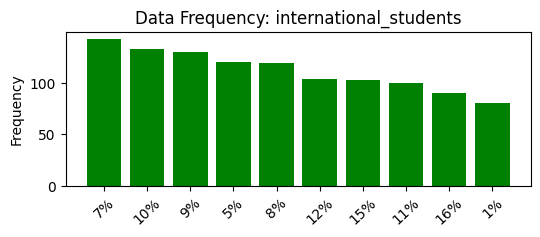

international_students
7%     142
10%    133
9%     130
5%     120
8%     119
12%    104
15%    103
11%    100
16%     90
1%      80
Name: count, dtype: int64


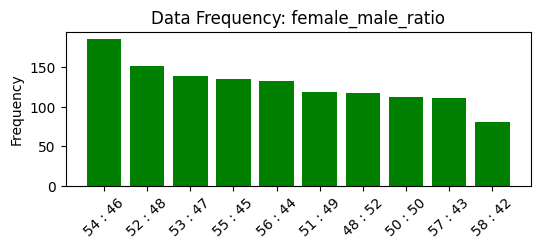

female_male_ratio
54 : 46    185
52 : 48    151
53 : 47    138
55 : 45    135
56 : 44    132
51 : 49    118
48 : 52    117
50 : 50    112
57 : 43    111
58 : 42     80
Name: count, dtype: int64


In [26]:
# Identify categorical columns in the dataset
categorical_columns = data_cleaned.select_dtypes(include= ["object"]).columns
# Plot bar charts for all categorical variables
for variable in categorical_columns:
    plotbar(variable, 10)

### Bivariate analysis
For this example, we plot the relationship between 'research' and 'total_score' for the selected countries.

In [27]:
# Filter data for United States and United Kingdom
usa_data = data_cleaned[data_cleaned.country == 'United States of America']
uk_data = data_cleaned[data_cleaned.country == 'United Kingdom']

# Create scatter plot for the United States
trace_usa = go.Scatter(
    x=usa_data['research'],  # X-axis: Research score
    y=usa_data['total_score'],  # Y-axis: Total score
    mode='markers',  # Use markers for the scatter plot
    name='United States',  # Legend name for United States
    marker=dict(color='blue', opacity=0.6)  # Marker customization for the USA data points
)

# Create scatter plot for the United Kingdom
trace_uk = go.Scatter(
    x=uk_data['research'],  # X-axis: Research score
    y=uk_data['total_score'],  # Y-axis: Total score
    mode='markers',  # Use markers for the scatter plot
    name='United Kingdom',  # Legend name for the UK
    marker=dict(color='red', opacity=0.6)  # Marker customization for the UK data points
)

# Combine the traces
data = [trace_usa, trace_uk]

# Create layout for the plot
layout = go.Layout(
    title='Relationship Between Research and Total Score by Country',
    xaxis=dict(title='Research Score'),
    yaxis=dict(title='Total Score'),
    showlegend=True  # Display legend for the countries
)

# Create figure and plot
fig = go.Figure(data=data, layout=layout)
iplot(fig)


### Correlation Between Numeric Variables

In [28]:
# Calculate correlation between numeric variables
numeric_correlation = data_cleaned.loc[:, ["research", "citations", "total_score", "income"]].corr() # correlation calculation
numeric_correlation

,research,citations,total_score,income
research,1.000000,0.204552,0.903944,0.312907
citations,0.204552,1.000000,0.558800,-0.129374
total_score,0.903944,0.558800,1.000000,0.238055
income,0.312907,-0.129374,0.238055,1.000000


### Pivot Table

In [29]:
pivot_table = data_cleaned.pivot_table(
    values="research",  # The column you want to aggregate
    index=["country"],     # Columns to group by (rows in the pivot table)
    columns=["year"],      # Columns for creating separate columns in the pivot table
    aggfunc="mean"         # Aggregation function (mean in this case)
)

pivot_table

year,2011,2012,2013,2014,2015,2016
country,,,,,,
Australia,51.833333,55.714286,63.775000,53.771429,55.725000,60.675000
Austria,40.250000,41.200000,46.700000,36.100000,39.700000,50.500000
Belgium,61.000000,50.533333,50.925000,44.325000,45.925000,53.200000
Brazil,NaN,58.000000,65.700000,NaN,NaN,NaN
Canada,59.000000,51.337500,56.514286,50.700000,48.414286,54.600000
China,47.200000,70.100000,76.400000,65.900000,51.150000,83.000000
Denmark,49.400000,34.900000,41.666667,35.100000,36.700000,41.100000
Egypt,28.000000,NaN,NaN,NaN,NaN,NaN
Finland,51.400000,54.200000,53.000000,46.500000,48.100000,60.400000


### Outlier Detection

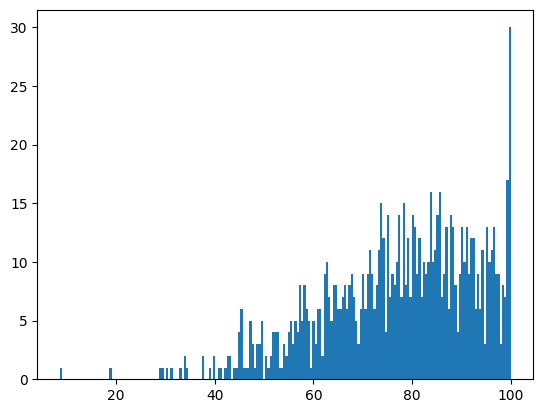

In [30]:
# Outlier detection for the 'citations' variable
citations = data_cleaned.citations
plt.hist(citations, bins =200)
plt.show()

In [31]:
Q1 = np.percentile(citations, 25) # First quartile
print("Q1:", Q1)

Q3 = np.percentile(citations, 75) # Third quartile
print("Q3:", Q3)

IQR = Q3 - Q1 # Interquartile range
print("IQR:", IQR)

Q1: 67.2
Q3: 89.6
IQR: 22.39999999999999


In [32]:
# Define upper and lower bounds for outliers
outlier_step = 1.5 * IQR
upper_level = Q3 + outlier_step
lower_level = Q1 - outlier_step
print("upper_level:", upper_level)
print("lower_level:", lower_level)

upper_level: 123.19999999999999
lower_level: 33.600000000000016


Here we examined which values ​​are outliers for citations.

In [33]:
outlier_list_col = citations[(citations < lower_level) | (citations > upper_level)]
print(outlier_list_col)

150     29.0
180     32.9
193     29.2
303     31.2
378     18.8
761     30.2
1963     8.6
Name: citations, dtype: float64


This time, let's define a function to determine whether there is any feature outlier in the data set and then visualize it in the form of boxplot and histogram within this function.

In [34]:
# Anomaly detection function
def detect_and_visualize_anomalies(data, feature):
    # Select the feature data
    feature_data = data[feature]
    
    # Calculate Q1, Q3, and IQR
    Q1 = np.percentile(feature_data, 25)  # First quartile
    Q3 = np.percentile(feature_data, 75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    
    # Define bounds for outliers
    outlier_step = 1.5 * IQR
    lower_bound = Q1 - outlier_step
    upper_bound = Q3 + outlier_step
    
    # Identify outliers
    anomalies = feature_data[(feature_data < lower_bound) | (feature_data > upper_bound)]
    
    # Visualization
    plt.figure(figsize=(14, 6))
    
    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(feature_data, bins=30, color='skyblue', edgecolor='black')
    plt.axvline(lower_bound, color='red', linestyle='dashed', linewidth=1, label='Lower Bound')
    plt.axvline(upper_bound, color='green', linestyle='dashed', linewidth=1, label='Upper Bound')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    
    # Boxplot
    plt.subplot(1, 2, 2)
    plt.boxplot(feature_data, vert=False, patch_artist=True, 
                boxprops=dict(facecolor='skyblue', color='black'),
                flierprops=dict(marker='o', color='red', markersize=5))
    plt.axvline(lower_bound, color='red', linestyle='dashed', linewidth=1, label='Lower Bound')
    plt.axvline(upper_bound, color='green', linestyle='dashed', linewidth=1, label='Upper Bound')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return anomalies

Before creating the function, we determined the outliers for citations, now let's see when we run it with the function.

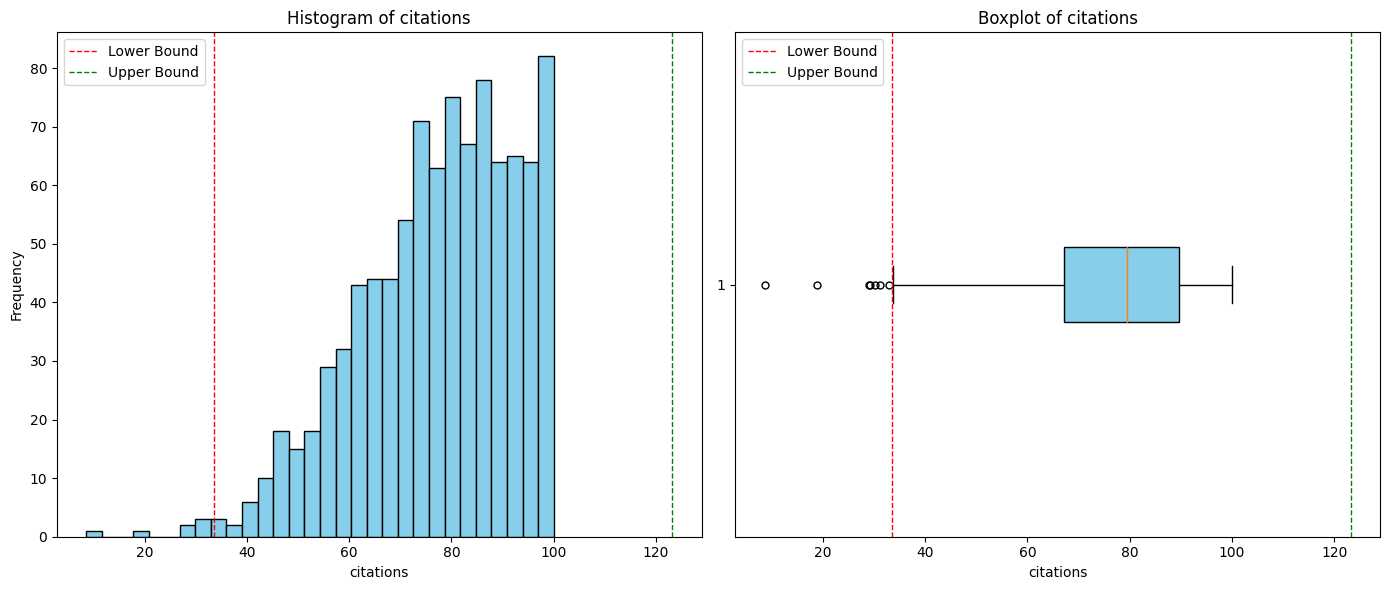

detected anomalies:
150     29.0
180     32.9
193     29.2
303     31.2
378     18.8
761     30.2
1963     8.6
Name: citations, dtype: float64


In [35]:
outliers = detect_and_visualize_anomalies(data_cleaned, "citations")
print("detected anomalies:")
print(outliers)

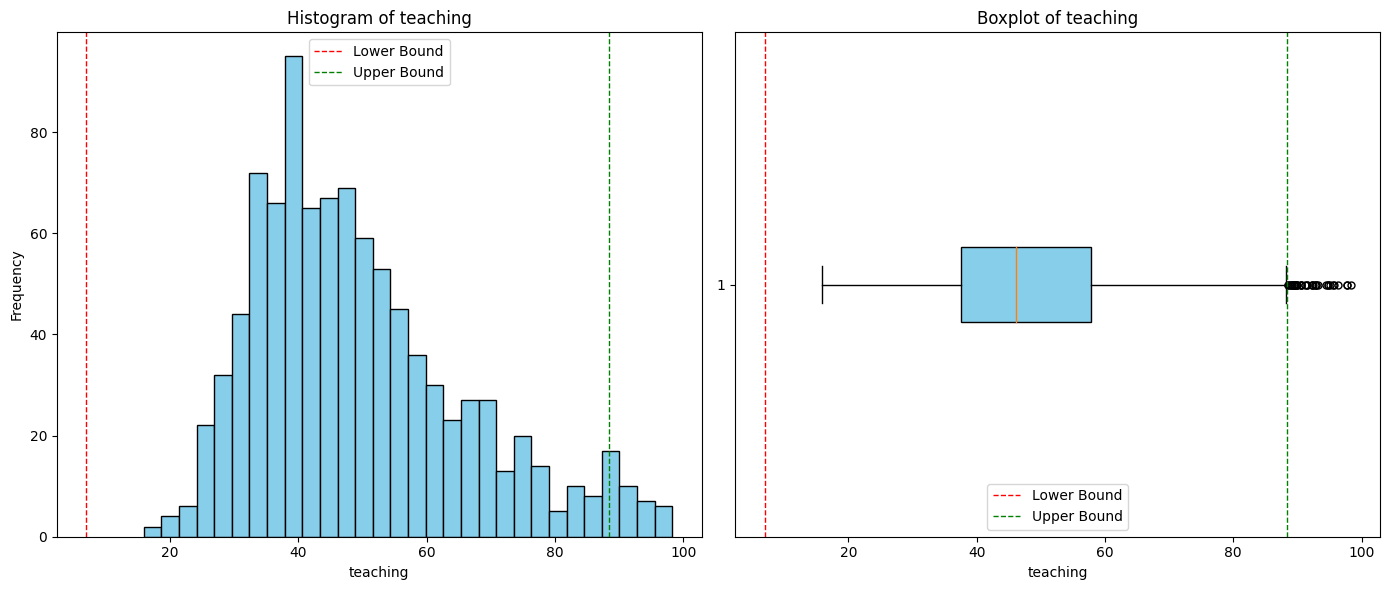

detected anomalies:
1       97.7
2       97.8
3       98.3
5       90.5
8       89.2
200     95.7
202     94.8
203     89.5
204     91.5
205     90.5
206     92.7
207     88.8
210     92.3
602     96.3
603     95.0
604     89.7
606     92.9
607     89.5
608     91.2
612     93.2
616     90.0
1002    94.4
1004    89.0
1005    94.7
1006    92.9
1007    89.9
1008    90.6
1012    89.5
1402    92.2
1404    88.6
1405    91.5
1406    89.7
1407    89.1
1411    88.5
1803    95.6
1805    92.5
1807    89.4
Name: teaching, dtype: float64


In [36]:
outliers = detect_and_visualize_anomalies(data_cleaned, "teaching")
print("detected anomalies:")
print(outliers)